In [6]:
# We define the data transformations and loaders to load the images and their corresponding
# labels from the training folder. We use the Adam optimizer and cross-entropy loss function for training.
# Finally, we train the model for 10 epochs and save the model weights.
# The training data is loaded using PyTorch's DataLoader, and the model is trained using the Adam optimizer and
# cross-entropy loss. The trained model is then saved to a file for later use.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt

import numpy as np

from model import GenderClassifier

In [8]:
# Define the data transformations and loaders
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_set = datasets.ImageFolder('mfc_dataset_train_test/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False)
classes = train_loader.dataset.classes

Feature batch shape: torch.Size([32, 3, 12, 98])
Labels batch shape: torch.Size([32])


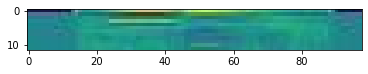

Label: 0 = female


In [9]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = np.einsum('cxy->xyc', train_features[0])
plt.imshow(img)
plt.show()
label = 0
print(f"Label: {label} = {classes[label]}")

In [14]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

def run_and_evaluate_model(lr):
    print(f'Running model with learning rate {lr}')

    # Initialize the model, loss function, and optimizer
    model = GenderClassifier().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train the model
    for epoch in range(20):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Save the model
    torch.save(model.state_dict(), f'saved_model/weights{lr}')

    test_set = datasets.ImageFolder('mfc_dataset_train_test/test', transform=transform)
    test_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False)

    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

In [15]:
for lr in [0.1, 0.01, 0.001]:
    run_and_evaluate_model(lr)


Running model with learning rate 0.1
Epoch 1, Loss: 9530.017777619441
Epoch 2, Loss: 36781.85
Epoch 3, Loss: 571.2580669528024
Epoch 4, Loss: 0.22180866273201535
Epoch 5, Loss: 0.20298504572093953
Epoch 6, Loss: 0.20392853445850778
Epoch 7, Loss: 0.2046178752936345
Epoch 8, Loss: 0.20492830631307637
Epoch 9, Loss: 0.20506436264685665
Epoch 10, Loss: 0.20512363659373173
Epoch 11, Loss: 0.2051495619798079
Epoch 12, Loss: 0.2051609145537562
Epoch 13, Loss: 0.20516561860971463
Epoch 14, Loss: 0.20516761537757702
Epoch 15, Loss: 0.20516847691510337
Epoch 16, Loss: 0.205168953256992
Epoch 17, Loss: 0.20516907115195257
Epoch 18, Loss: 0.2051691508688964
Epoch 19, Loss: 0.20516917922658226
Epoch 20, Loss: 0.20516921729485815
Accuracy: 79.16666666666667 %
Running model with learning rate 0.01
Epoch 1, Loss: 4.07206472214063
Epoch 2, Loss: 3.936238265021959
Epoch 3, Loss: 0.3188653849065304
Epoch 4, Loss: 0.328089708622545
Epoch 5, Loss: 0.3876932323301832
Epoch 6, Loss: 0.41244597066442173
Epoc